# YELP Data Analysis

## Data Identification

The API chosen is a Developers API provided by Yelp.

API URL: https://api.yelp.com/v3/businesses/search

End Point: This endpoint returns detailed business content. 
    Normally, you would get the Business ID from /businesses/search, /businesses/search/phone, /transactions/{transaction_type}/search or /autocomplete. 
    To retrieve review excerpts for a business, please refer to our Reviews endpoint (/businesses/{id}/reviews).

In [1]:
#import the necessary libraries.
import requests as rq
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sn

To request the data from API I have made use of 'requests' package. To handle the JSON data, 'json' package is used. 'pandas' used for data transformation and analysis.

## Data Collection

Here I am trying to query the API end point to provide the data for places that are open now and serve food at the Seattle City. Since the API limits the data to 50 records per request, I am trying to make multiple requests to API to gather a considerable amount of data.

In [2]:
# Base URL
url = "https://api.yelp.com/v3/businesses/search"

# API key
api = "IuRleuk-7zBO21T-2utK4bzi14HbgASpMeoBeKoha40gdv2jMi7U6ng1IdET0HyXD_wDMM2B-kYDZzQ3q0ObSPacEDnB5tnW5H41Pyn6R6q-9E4_I-F0hMMxAiBIX3Yx"

#Authorization
headers = { "Authorization": "Bearer " + api }

bus = []

for i in range(0, 1000, 50):
    #passing the parameters to the API.
    params = {"term":"food","location": "Seattle", "open_now": True, "limit": 50,"offset": i, "c"
          'businesses[x].transactions': ['pickup', 'delivery', 'restaurant_reservation']}
    response = rq.get(url, headers = headers, params = params)
    if response.reason == 'OK':
        bus += response.json()["businesses"]
    else: 
        print(response.reason)


In [3]:
#Dump the requested JSOn into a variable.
content = json.dumps(bus, indent=4)

#Write the dumped content into a JSON file.
file = open('./yelpBusiness.json', 'w')
file.writelines(content)
file.close()

In [4]:
#Import the raw data from JSOn file.
data = pd.read_json('yelpBusiness.json')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             356 non-null    object 
 1   alias          356 non-null    object 
 2   name           356 non-null    object 
 3   image_url      356 non-null    object 
 4   is_closed      356 non-null    bool   
 5   url            356 non-null    object 
 6   review_count   356 non-null    int64  
 7   categories     356 non-null    object 
 8   rating         356 non-null    float64
 9   coordinates    356 non-null    object 
 10  transactions   356 non-null    object 
 11  price          301 non-null    object 
 12  location       356 non-null    object 
 13  phone          356 non-null    object 
 14  display_phone  356 non-null    object 
 15  distance       356 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 42.2+ KB


In [5]:
data.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.66244, 'longitude': -122.31344}","[pickup, delivery]",$$,"{'address1': '4541 University Way NE', 'addres...",+12065489539,(206) 548-9539,4444.492980
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,"[{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...",4.5,"{'latitude': 47.613416, 'longitude': -122.346515}",[],$,"{'address1': '1st & Bell', 'address2': None, '...",+18885714447,(888) 571-4447,1568.975985
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.6186249211818, 'longitude': -1...","[pickup, delivery]",$$,"{'address1': '1833 Broadway', 'address2': '', ...",+12064135870,(206) 413-5870,1321.550808
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.65805, 'longitude': -122.31346}","[pickup, delivery]",$,"{'address1': '4139 University Way NE', 'addres...",+12066325253,(206) 632-5253,3987.299988
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.5,"{'latitude': 47.60199, 'longitude': -122.33475}","[pickup, delivery]",NaN,"{'address1': '88 Yesler Way', 'address2': None...",+12066821139,(206) 682-1139,2619.647020


I encountered that there is problem in few of the columns in the data set
1. categories - [{'alias': 'sportsbars', 'title': 'Sports Bars'}].
2. coordinates - {'latitude': 40.764164, 'longitude': -73.98306}.
3. transactions - {'address1': '236 W 54th St', 'address2': '', ...}]

To normalize this i have used json.normalize().

In [6]:
#To convert the str to json first.
data_cat_1 = data['categories'].to_json(orient='values')

#To import the values as json.
data_cat_2 = pd.read_json(data_cat_1)

#To convert json into json as records.
data_cat_3 = data_cat_2[0].to_json(orient='records')

#Reading from the json.
data_cat = pd.read_json(data_cat_3)

#Selecting only the 'title' column and returning a pandas DataFrame.
data_categories = data_cat[['title']]

#To make sure, that the object is a DataFrame type
print(type(data_categories))

#Renaming the column to 'category'
data_categories.columns = ['category']

data_categories

<class 'pandas.core.frame.DataFrame'>


,category
0,Mediterranean
1,Hot Dogs
2,Mediterranean
3,Greek
4,Sandwiches
...,...
351,Car Wash
352,Convenience Stores
353,Convenience Stores
354,Convenience Stores


In [7]:
#Concatenate the normalized data into the raw data
data = pd.concat([data, data_categories], axis=1)
data.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,category
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.66244, 'longitude': -122.31344}","[pickup, delivery]",$$,"{'address1': '4541 University Way NE', 'addres...",+12065489539,(206) 548-9539,4444.492980,Mediterranean
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,"[{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...",4.5,"{'latitude': 47.613416, 'longitude': -122.346515}",[],$,"{'address1': '1st & Bell', 'address2': None, '...",+18885714447,(888) 571-4447,1568.975985,Hot Dogs
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.6186249211818, 'longitude': -1...","[pickup, delivery]",$$,"{'address1': '1833 Broadway', 'address2': '', ...",+12064135870,(206) 413-5870,1321.550808,Mediterranean
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.65805, 'longitude': -122.31346}","[pickup, delivery]",$,"{'address1': '4139 University Way NE', 'addres...",+12066325253,(206) 632-5253,3987.299988,Greek
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.5,"{'latitude': 47.60199, 'longitude': -122.33475}","[pickup, delivery]",NaN,"{'address1': '88 Yesler Way', 'address2': None...",+12066821139,(206) 682-1139,2619.647020,Sandwiches


In [8]:
# To split the co-ordinates into different columns lattitude and longitude.
data_co_ordinates = json_normalize(data['coordinates'], sep='_')
data_co_ordinates.head()

C:\Users\Win10\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,latitude,longitude
0,47.662440,-122.313440
1,47.613416,-122.346515
2,47.618625,-122.321042
3,47.658050,-122.313460
4,47.601990,-122.334750


In [9]:
#Concatenate the normalized data into the raw data
data = pd.concat([data, data_co_ordinates], axis=1)
data.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,category,latitude,longitude
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.66244, 'longitude': -122.31344}","[pickup, delivery]",$$,"{'address1': '4541 University Way NE', 'addres...",+12065489539,(206) 548-9539,4444.492980,Mediterranean,47.662440,-122.313440
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,"[{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...",4.5,"{'latitude': 47.613416, 'longitude': -122.346515}",[],$,"{'address1': '1st & Bell', 'address2': None, '...",+18885714447,(888) 571-4447,1568.975985,Hot Dogs,47.613416,-122.346515
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.6186249211818, 'longitude': -1...","[pickup, delivery]",$$,"{'address1': '1833 Broadway', 'address2': '', ...",+12064135870,(206) 413-5870,1321.550808,Mediterranean,47.618625,-122.321042
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.65805, 'longitude': -122.31346}","[pickup, delivery]",$,"{'address1': '4139 University Way NE', 'addres...",+12066325253,(206) 632-5253,3987.299988,Greek,47.658050,-122.313460
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.5,"{'latitude': 47.60199, 'longitude': -122.33475}","[pickup, delivery]",NaN,"{'address1': '88 Yesler Way', 'address2': None...",+12066821139,(206) 682-1139,2619.647020,Sandwiches,47.601990,-122.334750


In [10]:
#Extracting only the records with values.
data_transactions = data['transactions'].to_json(orient = 'records')
data_transactions = pd.read_json(data_transactions)

#renaming the column names
data_transactions.columns = ['is_pickup', 'is_delivery']
data_transactions.head()

,is_pickup,is_delivery
0,pickup,delivery
1,None,None
2,pickup,delivery
3,pickup,delivery
4,pickup,delivery


In [11]:
#Concatenate the normalized data into the raw data
data = pd.concat([data, data_transactions], axis=1)
data.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,price,location,phone,display_phone,distance,category,latitude,longitude,is_pickup,is_delivery
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.66244, 'longitude': -122.31344}",...,$$,"{'address1': '4541 University Way NE', 'addres...",+12065489539,(206) 548-9539,4444.492980,Mediterranean,47.662440,-122.313440,pickup,delivery
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,"[{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...",4.5,"{'latitude': 47.613416, 'longitude': -122.346515}",...,$,"{'address1': '1st & Bell', 'address2': None, '...",+18885714447,(888) 571-4447,1568.975985,Hot Dogs,47.613416,-122.346515,None,None
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.6186249211818, 'longitude': -1...",...,$$,"{'address1': '1833 Broadway', 'address2': '', ...",+12064135870,(206) 413-5870,1321.550808,Mediterranean,47.618625,-122.321042,pickup,delivery
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.65805, 'longitude': -122.31346}",...,$,"{'address1': '4139 University Way NE', 'addres...",+12066325253,(206) 632-5253,3987.299988,Greek,47.658050,-122.313460,pickup,delivery
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.5,"{'latitude': 47.60199, 'longitude': -122.33475}",...,NaN,"{'address1': '88 Yesler Way', 'address2': None...",+12066821139,(206) 682-1139,2619.647020,Sandwiches,47.601990,-122.334750,pickup,delivery


In [12]:
#Concatenate the normalized data into the raw data
data_location = json_normalize(data['location'], sep='_')
data_location.head()

C:\Users\Win10\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,address1,address2,address3,city,zip_code,country,state,display_address
0,4541 University Way NE,None,,Seattle,98105,US,WA,"[4541 University Way NE, Seattle, WA 98105]"
1,1st & Bell,None,,Seattle,98101,US,WA,"[1st & Bell, Seattle, WA 98101]"
2,1833 Broadway,,None,Seattle,98122,US,WA,"[1833 Broadway, Seattle, WA 98122]"
3,4139 University Way NE,,,Seattle,98105,US,WA,"[4139 University Way NE, Seattle, WA 98105]"
4,88 Yesler Way,None,,Seattle,98104,US,WA,"[88 Yesler Way, Seattle, WA 98104]"


In [13]:
#Concatenate the normalized data into the raw data
data = pd.concat([data, data_location], axis=1)
data

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,is_pickup,is_delivery,address1,address2,address3,city,zip_code,country,state,display_address
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.66244, 'longitude': -122.31344}",...,pickup,delivery,4541 University Way NE,None,,Seattle,98105,US,WA,"[4541 University Way NE, Seattle, WA 98105]"
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,"[{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...",4.5,"{'latitude': 47.613416, 'longitude': -122.346515}",...,None,None,1st & Bell,None,,Seattle,98101,US,WA,"[1st & Bell, Seattle, WA 98101]"
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.5,"{'latitude': 47.6186249211818, 'longitude': -1...",...,pickup,delivery,1833 Broadway,,None,Seattle,98122,US,WA,"[1833 Broadway, Seattle, WA 98122]"
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.65805, 'longitude': -122.31346}",...,pickup,delivery,4139 University Way NE,,,Seattle,98105,US,WA,"[4139 University Way NE, Seattle, WA 98105]"
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.5,"{'latitude': 47.60199, 'longitude': -122.33475}",...,pickup,delivery,88 Yesler Way,None,,Seattle,98104,US,WA,"[88 Yesler Way, Seattle, WA 98104]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,tfeBBN2Tu0OEQJZvTJQRBg,west-hills-76-bremerton,West Hills 76,,False,https://www.yelp.com/biz/west-hills-76-bremert...,5,"[{'alias': 'carwash', 'title': 'Car Wash'}, {'...",1.0,"{'latitude': 47.558445, 'longitude': -122.675418}",...,None,None,4650 Werner Rd,,,Bremerton,98312,US,WA,"[4650 Werner Rd, Bremerton, WA 98312]"
352,snWehvFj83OXGANGd4ohCw,7-eleven-seatac-4,7-Eleven,,False,https://www.yelp.com/biz/7-eleven-seatac-4?adj...,2,"[{'alias': 'convenience', 'title': 'Convenienc...",1.0,"{'latitude': 47.4085653845738, 'longitude': -1...",...,None,None,21454 Pacific Hwy S,,,Seatac,98198,US,WA,"[21454 Pacific Hwy S, Seatac, WA 98198]"
353,6HMAajjCsAIOV0oz3L7YyQ,7-eleven-burien-2,7-Eleven,,False,https://www.yelp.com/biz/7-eleven-burien-2?adj...,1,"[{'alias': 'convenience', 'title': 'Convenienc...",1.0,"{'latitude': 47.4981735932655, 'longitude': -1...",...,None,None,11657 Des Moines Memorial,,,Burien,98168,US,WA,"[11657 Des Moines Memorial, Burien, WA 98168]"
354,72bwH7uEzjERRD1R9NOZWA,7-eleven-kent-5,7-Eleven,https://s3-media3.fl.yelpcdn.com/bphoto/m5dviS...,False,https://www.yelp.com/biz/7-eleven-kent-5?adjus...,4,"[{'alias': 'convenience', 'title': 'Convenienc...",1.5,"{'latitude': 47.3816050800746, 'longitude': -1...",...,None,None,1481 W Meeker St,,,Kent,98032,US,WA,"[1481 W Meeker St, Kent, WA 98032]"


In [14]:
# Drop down the unwanted colmns
data = data.drop(columns = ['categories', 'coordinates', 'transactions', 'location'])
data

,id,alias,name,image_url,is_closed,url,review_count,rating,price,phone,...,is_pickup,is_delivery,address1,address2,address3,city,zip_code,country,state,display_address
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,4.5,$$,+12065489539,...,pickup,delivery,4541 University Way NE,None,,Seattle,98105,US,WA,"[4541 University Way NE, Seattle, WA 98105]"
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,4.5,$,+18885714447,...,None,None,1st & Bell,None,,Seattle,98101,US,WA,"[1st & Bell, Seattle, WA 98101]"
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,4.5,$$,+12064135870,...,pickup,delivery,1833 Broadway,,None,Seattle,98122,US,WA,"[1833 Broadway, Seattle, WA 98122]"
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,4.0,$,+12066325253,...,pickup,delivery,4139 University Way NE,,,Seattle,98105,US,WA,"[4139 University Way NE, Seattle, WA 98105]"
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,3.5,NaN,+12066821139,...,pickup,delivery,88 Yesler Way,None,,Seattle,98104,US,WA,"[88 Yesler Way, Seattle, WA 98104]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,tfeBBN2Tu0OEQJZvTJQRBg,west-hills-76-bremerton,West Hills 76,,False,https://www.yelp.com/biz/west-hills-76-bremert...,5,1.0,$$$,+13607920972,...,None,None,4650 Werner Rd,,,Bremerton,98312,US,WA,"[4650 Werner Rd, Bremerton, WA 98312]"
352,snWehvFj83OXGANGd4ohCw,7-eleven-seatac-4,7-Eleven,,False,https://www.yelp.com/biz/7-eleven-seatac-4?adj...,2,1.0,$,+12068783858,...,None,None,21454 Pacific Hwy S,,,Seatac,98198,US,WA,"[21454 Pacific Hwy S, Seatac, WA 98198]"
353,6HMAajjCsAIOV0oz3L7YyQ,7-eleven-burien-2,7-Eleven,,False,https://www.yelp.com/biz/7-eleven-burien-2?adj...,1,1.0,$,+12062416288,...,None,None,11657 Des Moines Memorial,,,Burien,98168,US,WA,"[11657 Des Moines Memorial, Burien, WA 98168]"
354,72bwH7uEzjERRD1R9NOZWA,7-eleven-kent-5,7-Eleven,https://s3-media3.fl.yelpcdn.com/bphoto/m5dviS...,False,https://www.yelp.com/biz/7-eleven-kent-5?adjus...,4,1.5,$,+12538548949,...,None,None,1481 W Meeker St,,,Kent,98032,US,WA,"[1481 W Meeker St, Kent, WA 98032]"


In [15]:
# Saving the clean data into local
data.to_json('./yelp_business_clean.json', orient='records')

## Data Preparation and Analysis

In [16]:
#Read the data from clean json file and import it to a pandas DataFrame.
data_clean = pd.read_json('yelp_business_clean.json')
data_clean.head()

,id,alias,name,image_url,is_closed,url,review_count,rating,price,phone,...,is_pickup,is_delivery,address1,address2,address3,city,zip_code,country,state,display_address
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,4.5,$$,+12065489539,...,pickup,delivery,4541 University Way NE,None,,Seattle,98105,US,WA,"[4541 University Way NE, Seattle, WA 98105]"
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,4.5,$,+18885714447,...,None,None,1st & Bell,None,,Seattle,98101,US,WA,"[1st & Bell, Seattle, WA 98101]"
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,4.5,$$,+12064135870,...,pickup,delivery,1833 Broadway,,None,Seattle,98122,US,WA,"[1833 Broadway, Seattle, WA 98122]"
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,4.0,$,+12066325253,...,pickup,delivery,4139 University Way NE,,,Seattle,98105,US,WA,"[4139 University Way NE, Seattle, WA 98105]"
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,3.5,None,+12066821139,...,pickup,delivery,88 Yesler Way,None,,Seattle,98104,US,WA,"[88 Yesler Way, Seattle, WA 98104]"


In [17]:
# Storing the file into a csv file
data_clean.to_csv('yelp_clean.csv')

In [18]:
#Check the type of the df_clean
type(data_clean)

pandas.core.frame.DataFrame

In [19]:
# To check the number of records.
data_clean.shape

(356, 25)

In [20]:
#looking at the data types.
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               356 non-null    object 
 1   alias            356 non-null    object 
 2   name             356 non-null    object 
 3   image_url        356 non-null    object 
 4   is_closed        356 non-null    bool   
 5   url              356 non-null    object 
 6   review_count     356 non-null    int64  
 7   rating           356 non-null    float64
 8   price            301 non-null    object 
 9   phone            356 non-null    object 
 10  display_phone    356 non-null    object 
 11  distance         356 non-null    float64
 12  category         356 non-null    object 
 13  latitude         356 non-null    float64
 14  longitude        356 non-null    float64
 15  is_pickup        118 non-null    object 
 16  is_delivery      43 non-null     object 
 17  address1        

In [21]:
#Summary statistics
data_clean.describe()

,review_count,rating,distance,latitude,longitude,zip_code
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,59.578652,2.726124,16047.630051,47.609737,-122.300028,98122.084270
std,146.651573,1.013357,9563.156156,0.142106,0.126881,88.900442
min,1.000000,1.000000,464.965904,47.354883,-122.694545,98003.000000
25%,5.000000,2.000000,6378.185567,47.488522,-122.335591,98043.000000
50%,16.500000,2.500000,16987.958566,47.613528,-122.303132,98107.500000
75%,51.000000,3.500000,23230.920628,47.697626,-122.223029,98160.000000
max,1516.000000,5.000000,37976.801311,47.899330,-121.964289,98383.000000


In [22]:
data_clean.isnull().sum()

id                   0
alias                0
name                 0
image_url            0
is_closed            0
url                  0
review_count         0
rating               0
price               55
phone                0
display_phone        0
distance             0
category             0
latitude             0
longitude            0
is_pickup          238
is_delivery        313
address1             5
address2            58
address3            72
city                 0
zip_code             0
country              0
state                0
display_address      0
dtype: int64

In [23]:
data_clean = data_clean.fillna(value = np.nan)
data_clean

,id,alias,name,image_url,is_closed,url,review_count,rating,price,phone,...,is_pickup,is_delivery,address1,address2,address3,city,zip_code,country,state,display_address
0,n3KaV4ojMr34zdnJBTvRAw,aladdin-falafel-corner-seattle-2,Aladdin Falafel Corner,https://s3-media4.fl.yelpcdn.com/bphoto/ufQPl_...,False,https://www.yelp.com/biz/aladdin-falafel-corne...,445,4.5,$$,+12065489539,...,pickup,delivery,4541 University Way NE,NaN,,Seattle,98105,US,WA,"[4541 University Way NE, Seattle, WA 98105]"
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,4.5,$,+18885714447,...,NaN,NaN,1st & Bell,NaN,,Seattle,98101,US,WA,"[1st & Bell, Seattle, WA 98101]"
2,6cGW6DTYtkv2KAx4dsRKxQ,al-bacha-restaurant-seattle,Al Bacha Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/DV8LXt...,False,https://www.yelp.com/biz/al-bacha-restaurant-s...,97,4.5,$$,+12064135870,...,pickup,delivery,1833 Broadway,,NaN,Seattle,98122,US,WA,"[1833 Broadway, Seattle, WA 98122]"
3,XIdmWw-OMx5nhpuTSdxYlQ,aladdin-gyro-cery-seattle,Aladdin Gyro-Cery,https://s3-media1.fl.yelpcdn.com/bphoto/CuRDPK...,False,https://www.yelp.com/biz/aladdin-gyro-cery-sea...,478,4.0,$,+12066325253,...,pickup,delivery,4139 University Way NE,,,Seattle,98105,US,WA,"[4139 University Way NE, Seattle, WA 98105]"
4,KFH3QClCI_sPGjNiAwRh1w,fat-shack-seattle-2,Fat Shack,https://s3-media3.fl.yelpcdn.com/bphoto/frhefL...,False,https://www.yelp.com/biz/fat-shack-seattle-2?a...,48,3.5,NaN,+12066821139,...,pickup,delivery,88 Yesler Way,NaN,,Seattle,98104,US,WA,"[88 Yesler Way, Seattle, WA 98104]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,tfeBBN2Tu0OEQJZvTJQRBg,west-hills-76-bremerton,West Hills 76,,False,https://www.yelp.com/biz/west-hills-76-bremert...,5,1.0,$$$,+13607920972,...,NaN,NaN,4650 Werner Rd,,,Bremerton,98312,US,WA,"[4650 Werner Rd, Bremerton, WA 98312]"
352,snWehvFj83OXGANGd4ohCw,7-eleven-seatac-4,7-Eleven,,False,https://www.yelp.com/biz/7-eleven-seatac-4?adj...,2,1.0,$,+12068783858,...,NaN,NaN,21454 Pacific Hwy S,,,Seatac,98198,US,WA,"[21454 Pacific Hwy S, Seatac, WA 98198]"
353,6HMAajjCsAIOV0oz3L7YyQ,7-eleven-burien-2,7-Eleven,,False,https://www.yelp.com/biz/7-eleven-burien-2?adj...,1,1.0,$,+12062416288,...,NaN,NaN,11657 Des Moines Memorial,,,Burien,98168,US,WA,"[11657 Des Moines Memorial, Burien, WA 98168]"
354,72bwH7uEzjERRD1R9NOZWA,7-eleven-kent-5,7-Eleven,https://s3-media3.fl.yelpcdn.com/bphoto/m5dviS...,False,https://www.yelp.com/biz/7-eleven-kent-5?adjus...,4,1.5,$,+12538548949,...,NaN,NaN,1481 W Meeker St,,,Kent,98032,US,WA,"[1481 W Meeker St, Kent, WA 98032]"


### Plot of rating distribution

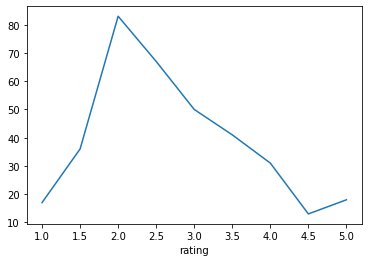

In [24]:
data_clean.groupby('rating').id.count().plot()

Insights:
By looking at the distribution, there are very less number of restaurants that have rating more than 2.
Almost half of the restaurants that are open now, have the rating 2 and above.

### Top 10 Categories of food that are served 

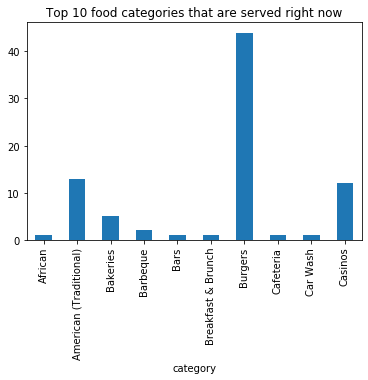

In [25]:
data_clean.groupby('category').id.count().head(10).plot(kind='bar', title = 'Top 10 food categories that are served right now')


Insights:
By looking at the graph, Burgers is the top category that is open.
American and Casinos are the next category after Burgers.

In [26]:
data_clean.dtypes

id                  object
alias               object
name                object
image_url           object
is_closed             bool
url                 object
review_count         int64
rating             float64
price               object
phone               object
display_phone       object
distance           float64
category            object
latitude           float64
longitude          float64
is_pickup           object
is_delivery         object
address1            object
address2            object
address3            object
city                object
zip_code             int64
country             object
state               object
display_address     object
dtype: object

### Indian restaurants delivering 

In [27]:
data_indian_delivery = data_clean[(data_clean['category']=='Indian') & (data_clean['is_delivery']=='delivery')]
data_indian_delivery.sample()

,id,alias,name,image_url,is_closed,url,review_count,rating,price,phone,...,is_pickup,is_delivery,address1,address2,address3,city,zip_code,country,state,display_address
74,8uE7nVyniLnCjJGjRMRmwg,sher-e-punjab-grill-seattle,Sher E Punjab Grill,https://s3-media1.fl.yelpcdn.com/bphoto/V2hZAN...,False,https://www.yelp.com/biz/sher-e-punjab-grill-s...,51,2.0,NaN,+12067081741,...,pickup,delivery,12336 Lake City Way NE,Ste A,,Seattle,98125,US,WA,"[12336 Lake City Way NE, Ste A, Seattle, WA 98..."


In [28]:
data_clean['category'].unique()

array(['Mediterranean', 'Hot Dogs', 'Greek', 'Sandwiches', 'Burgers',
       'Mexican', 'Vietnamese', 'Dim Sum', 'Pizza', 'African',
       'American (Traditional)', 'Street Vendors', 'Seafood', 'Russian',
       'Sushi Bars', 'Food Trucks', 'Food Stands', 'Fast Food',
       'Barbeque', 'Casinos', 'Middle Eastern', 'Cafeteria',
       'Food Delivery Services', 'Chocolatiers & Shops', 'Bakeries',
       'Italian', 'Bars', 'Gas Stations', 'Chicken Wings', 'Indian',
       'Filipino', 'Breakfast & Brunch', 'Caterers', 'Kombucha',
       'Internet Cafes', 'Olive Oil', 'Grocery', 'Coffee & Tea',
       'Convenience Stores', 'Cupcakes', 'Desserts',
       'Party & Event Planning', 'Donuts', 'Custom Cakes',
       'Kids Activities', 'Drugstores', 'Department Stores',
       'Juice Bars & Smoothies', 'Car Wash'], dtype=object)

### Restaurants having rating more than 4 and searving Hot Dogs with more review counts

In [29]:
data_clean[(data_clean['review_count'] >=10) & (data_clean['rating'] >=4) & (data_clean['category']=='Hot Dogs')]

,id,alias,name,image_url,is_closed,url,review_count,rating,price,phone,...,is_pickup,is_delivery,address1,address2,address3,city,zip_code,country,state,display_address
1,4nQXdT9DPYJFh-HC3EmuEw,monster-dogs-seattle,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Cb_nMT...,False,https://www.yelp.com/biz/monster-dogs-seattle?...,56,4.5,$,+18885714447,...,NaN,NaN,1st & Bell,NaN,,Seattle,98101,US,WA,"[1st & Bell, Seattle, WA 98101]"
21,Hp5kUwraNw3u_eq75CMCJA,comet-dogs-seattle-2,Comet Dogs,https://s3-media3.fl.yelpcdn.com/bphoto/xA-r13...,False,https://www.yelp.com/biz/comet-dogs-seattle-2?...,39,4.5,$,,...,NaN,NaN,922 E Pike St,,,Seattle,98122,US,WA,"[922 E Pike St, Seattle, WA 98122]"
31,Ns7QfVU0JwaQuzn-rjoHtQ,monster-dogs-seattle-2,Monster Dogs,https://s3-media2.fl.yelpcdn.com/bphoto/Duxi-b...,False,https://www.yelp.com/biz/monster-dogs-seattle-...,51,4.0,$,+18885714447,...,delivery,NaN,E Pike St And 10th Ave,,,Seattle,98122,US,WA,"[E Pike St And 10th Ave, Seattle, WA 98122]"


Conclusion:

In Seattle, there are very diverse restaurants that serve different kinds of food. In which, Burgers is the top category served in most of the restaurants. There are less number of restaurants rated above 2 stars, which indicates that Seattle's tends to eat less outside food and have a good number of restaurnats to choose from.